# **Exploratory Data Analysis**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv("labelled_data.csv", on_bad_lines='skip')
df.head()

,Unnamed: 0,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,...,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,label
0,0,103830542052943029552,Antonio Johnson,1598040677376,4.0,Nice place to shop,NaN,NaN,0x88620d38ddc6912d:0xf170103b5bdd20c,ALDI,...,"['Grocery store', 'Supermarket']",4.5,980,$,"[['Saturday', '9AM–8PM'], ['Sunday', '9AM–8PM'...","{'Service options': ['No-contact delivery', 'D...",NaN,"['0x886213253909d709:0x20729ba94de661d6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,invalid
1,1,107210239145842246852,Jennifer May,1543454795404,1.0,Did not care for the food.,NaN,NaN,0x889a0540f02d1cc7:0x6f35a1209dd9c274,Tuscany Pizza and Grill,...,"['Italian restaurant', 'Bar & grill', 'Caterin...",4.3,382,$$,"[['Friday', '11AM–9PM'], ['Saturday', '11AM–9P...","{'Service options': ['Outdoor seating', 'Curbs...",NaN,"['0x889a04b7050a2429:0xbdf992073d9ad3f5', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,invalid
2,2,101547008975387683728,J-Ray,1505583924028,5.0,Got everything your looking for the beach.,NaN,NaN,0x889a04c55a8cd883:0xd42096e55a7ccd9c,Walmart Supercenter,...,"['Department store', 'Clothing store', 'Craft ...",3.9,3631,$,"[['Friday', '7AM–11PM'], ['Saturday', '7AM–11P...","{'Service options': ['Curbside pickup', 'Deliv...",NaN,"['0x889a0546d459c547:0x5d9730198cc4fd73', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,valid
3,3,100748450221074810669,Ronald Lewandowski,1540336132677,5.0,Good place,NaN,NaN,0x8888a93d94717111:0x986225540c720f97,Pilot Travel Center,...,"['Truck stop', 'Convenience store', 'Gas stati...",4.2,1546,NaN,"[['Tuesday', 'Open 24 hours'], ['Wednesday', '...","{'Service options': ['In-store shopping', 'Del...",NaN,"['0x8888aec4b0173f7f:0x8ef8913009efb790', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,invalid
4,4,117669321539537284040,Charles,1593991366378,5.0,Very friendly staff,NaN,NaN,0x88626b73a65958d7:0x9d9c82315a6d0867,Bankston Motor Homes Parts & Service,...,['RV repair shop'],4.1,37,NaN,"[['Sunday', 'Closed'], ['Monday', '8AM–5PM'], ...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM Mon,NaN,https://www.google.com/maps/place//data=!4m2!3...,invalid


# Histogram of Review Length

In [3]:
df["review_length"] = df["text"].apply(lambda x: len(str(x).split()))

Text(0, 0.5, 'Frequency')

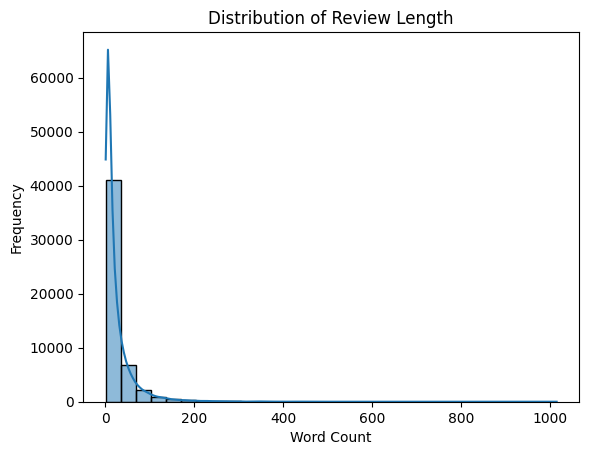

In [4]:
sns.histplot(df["review_length"], bins = 30, kde = True)
plt.title("Distribution of Review Length")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# Boxplot of Rating vs Review Length

Text(0, 0.5, 'Review Length')

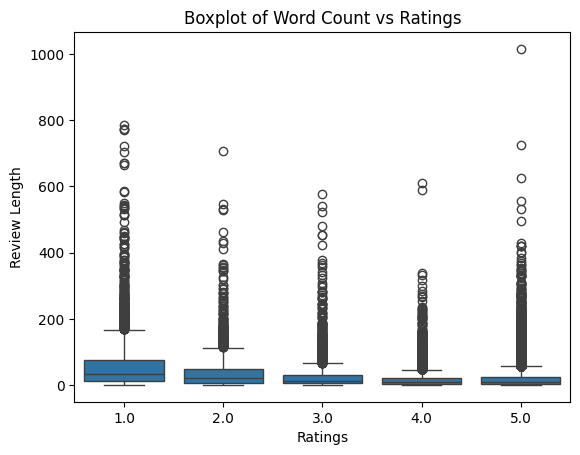

In [5]:
sns.boxplot(df, x = "rating", y = "review_length")
plt.title("Boxplot of Word Count vs Ratings")
plt.xlabel("Ratings")
plt.ylabel("Review Length")

# Word Clouds of the Frequency of Words Mentioned in the Reviews

**General**

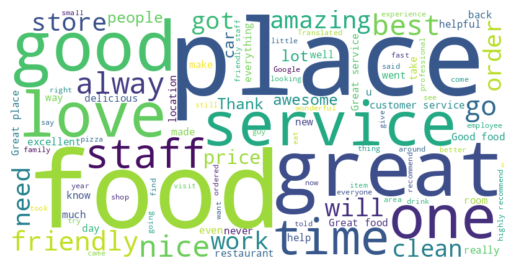

In [7]:
all_reviews = " ".join(df["text"].astype(str))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 400, background_color = "white",
                      stopwords = stopwords, max_words = 100, min_font_size = 10,
                      colormap = "viridis", contour_color = "black", contour_width = 1
                      ).generate(all_reviews)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

**By Ratings**

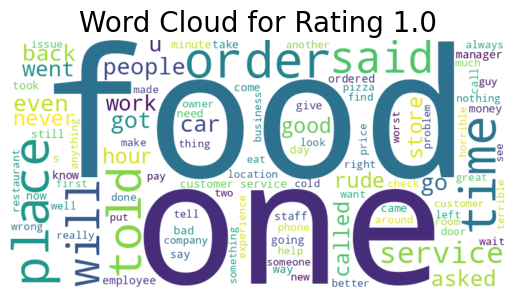

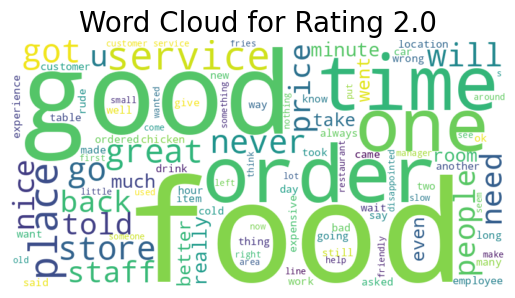

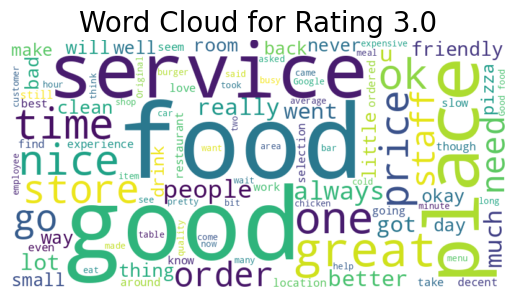

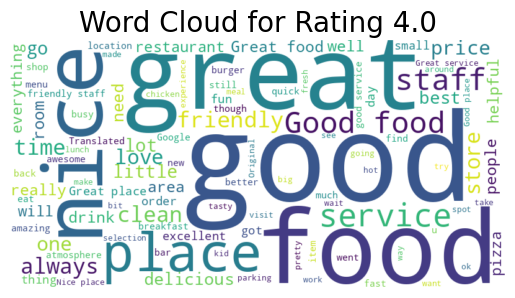

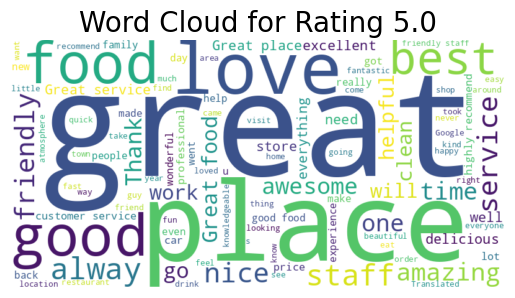

In [10]:
for i in sorted(df["rating"].unique()):
  rating_reviews = " ".join(df[df["rating"] == i]["text"].astype(str))
  if not rating_reviews.strip():
    continue

  wordcloud = WordCloud(width = 800, height = 400, background_color = "white",
                      stopwords = stopwords, max_words = 100, min_font_size = 10,
                      colormap = "viridis", contour_color = "black", contour_width = 1
                      ).generate(rating_reviews)

  plt.imshow(wordcloud, interpolation = "bilinear")
  plt.axis("off")
  plt.title(f"Word Cloud for Rating {i}", fontsize = 20)
  plt.show()

# Bar Chart of Ratings

**General**

In [11]:
rating_counts = df["rating"].value_counts().sort_index()

([<matplotlib.axis.XTick at 0x7b4c44059be0>,
 [Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5')])

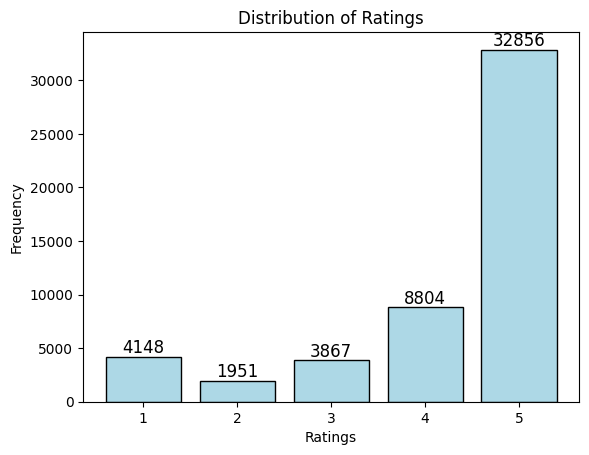

In [12]:
bars = plt.bar(rating_counts.index, rating_counts.values, color = "lightblue", edgecolor = "black")

# Add annotations
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha = "center", va = "bottom", fontsize = 12)

plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.xticks(rating_counts.index)

# Label Distribution

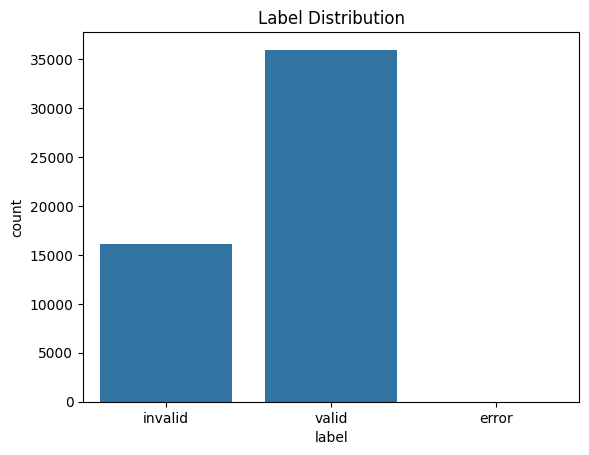

In [16]:
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.show()

# Distribution of Rating, Average Rating, and Number of Reviews

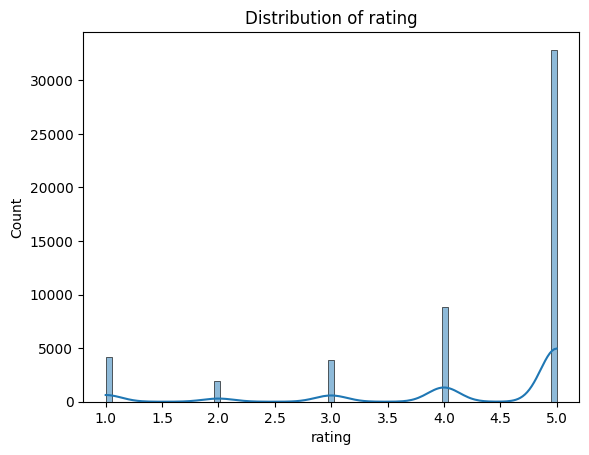

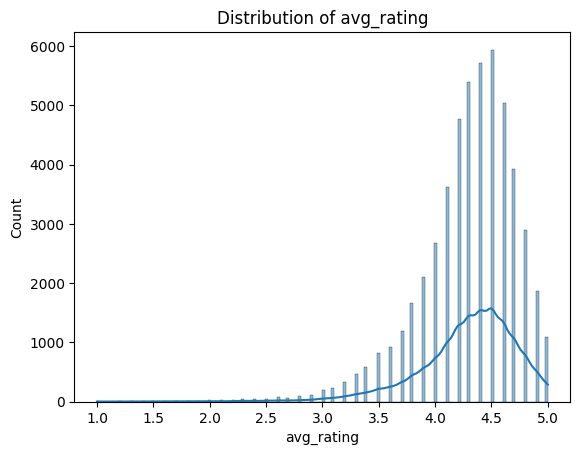

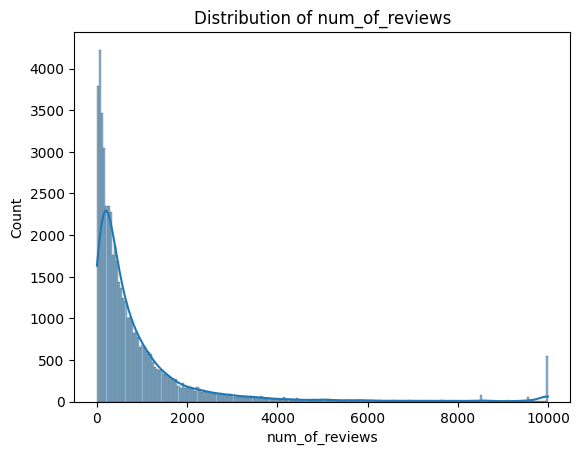

In [20]:
numeric_cols = ['rating', 'avg_rating', 'num_of_reviews']
for col in numeric_cols:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()